
# Confidence interval (2)

This notebook covers the following cases:

1. unknown $\sigma$, data with any distribution, large sample ($n \ge 30$)

## Imports and data

Required imports

In [4]:
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

Configure values for the problem space

In [5]:
mu = 450
n = 100
LoCpc = 95

Prepare a random sample to work with (with the given parameters). We have to specify a standard deviation to get a sample of data, however, after that we 'forget' the value for sigma and work as if the standard deviation is unknown.

In [7]:
sigma = 10
sample = np.random.normal(loc=mu, scale=sigma, size=n)

## Preparation

We calculate the sample mean, $\bar{x}$.

In [8]:
xmean = stats.mstats.tmean(sample)
xmean

448.942281796995

We calculate the sample standard deviation to estimate the population standard deviation. The parameter `ddof` tells the function to divide by `n - ddof` rather than n. In our case, we want division by $n - 1$.

In [14]:
S = stats.tstd(sample, ddof=1)
S

9.305745442294084

Calculate the standard error from the population standard deviation estimate.

In [15]:
stdErr = S / math.sqrt(n)
stdErr

0.9305745442294084

## Confidence interval (identical to that in notebook Confidence Interval (1))

Now we can go through the same steps as we do manually to determine the confidence interval.


Find the cut-off points in the z-distribution. The first argument to `interval()` is the confidence as a fraction of 1.

In [27]:
zAlphaHalvedNeg, zAlphaHalvedPos = stats.norm.interval(LoCpc / 100)
print(zAlphaHalvedNeg, zAlphaHalvedPos)

-1.959963984540054 1.959963984540054


De-normalise the upper cut-off point.

In [28]:
halfIntervalWidth = zAlphaHalvedPos * stdErr
halfIntervalWidth

1.8238925916194162

Print the confidence interval.

In [29]:
print('Confidence interval: {0:.3f} \u00b1 {1:.3f}'.format(xmean, halfIntervalWidth))

Confidence interval: 448.942 ± 1.824


## Plot  (identical to that in notebook Confidence Interval (1))

Prepare the data

In [25]:
halfFigWidthInStdErr = 3
pointsPerStdErr = 20
plotXMin = xmean - halfFigWidthInStdErr * stdErr
plotXMax = xmean + halfFigWidthInStdErr * stdErr
plotYMin = 0
plotYMax = stats.norm.pdf(xmean, xmean, stdErr) * 1.2

x = np.linspace(plotXMin, plotXMax, pointsPerStdErr * halfFigWidthInStdErr * 2)

Plot

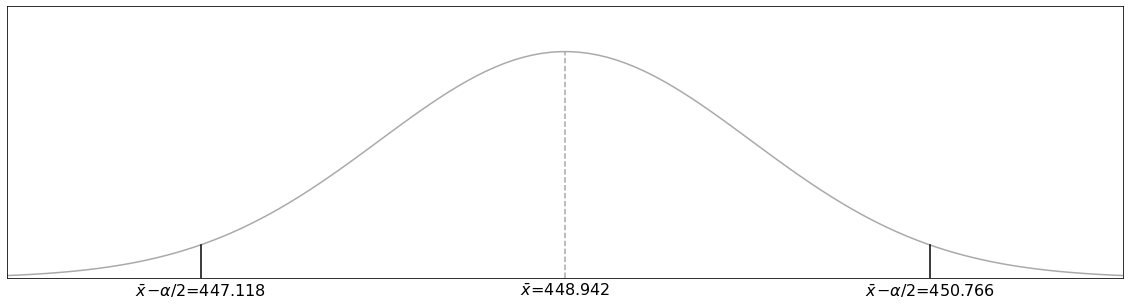

In [26]:
plt.figure(figsize=(20,5)) 
plt.xlim([plotXMin, plotXMax])
plt.tick_params(length=0)
plt.ylim([0, plotYMax])

plt.xticks([xmean - halfIntervalWidth, xmean, xmean + halfIntervalWidth], 
           [r'$\bar x\!-\!\alpha/2$={0:.3f}'.format(xmean - halfIntervalWidth), 
            r'$\bar x$={0:.3f}'.format(xmean), 
            r'$\bar x\!-\!\alpha/2$={0:.3f}'.format(xmean + halfIntervalWidth)], fontsize=16)
plt.yticks([])

plt.plot(x, stats.norm.pdf(x, xmean, stdErr), color='darkgray')
plt.plot([xmean - halfIntervalWidth, xmean - halfIntervalWidth], 
         [0, stats.norm.pdf(xmean - halfIntervalWidth, xmean, stdErr)], color='black')
plt.plot([xmean + halfIntervalWidth, xmean + halfIntervalWidth], 
         [0, stats.norm.pdf(xmean - halfIntervalWidth, xmean, stdErr)], color='black')
plt.plot([xmean, xmean], [0, stats.norm.pdf(xmean, xmean, stdErr)], color='darkgray', linestyle='--')
plt.show()